In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('/Users/kirtiii/Downloads/batteries.csv')
data.head(10)

,ID,Week,Location,Product,Quantity,Year
0,1000,1,Vancouver,A4 Batteries (4-pack),69,2002
1,1001,2,Vancouver,A4 Batteries (4-pack),115,2002
2,1002,3,Vancouver,A4 Batteries (4-pack),99,2002
3,1003,4,Vancouver,A4 Batteries (4-pack),98,2002
4,1004,5,Vancouver,A4 Batteries (4-pack),102,2002
5,1005,6,Vancouver,A4 Batteries (4-pack),148,2002
6,1006,7,Vancouver,A4 Batteries (4-pack),25,2002
7,1007,8,Vancouver,A4 Batteries (4-pack),134,2002
8,1008,9,Vancouver,A4 Batteries (4-pack),52,2002
9,1009,10,Vancouver,A4 Batteries (4-pack),132,2002


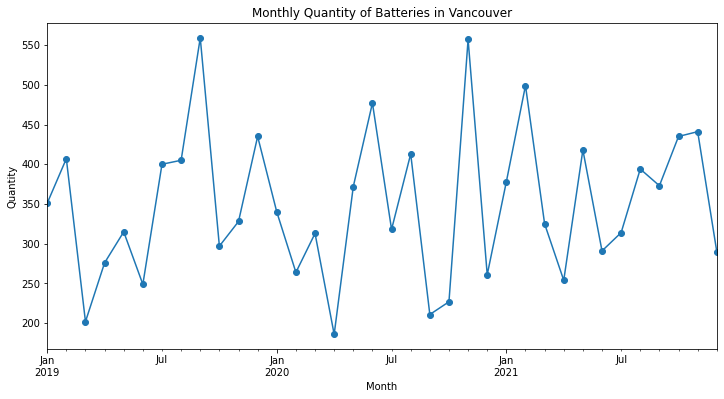

In [6]:
warnings.filterwarnings("ignore")
vancouver_data= data[(data['Location']== 'Vancouver')& (data['Year']>=2019)& (data['Year']<= 2021)]
vancouver_data['Date']= vancouver_data['Year'].astype(str)+ '-'+ vancouver_data['Week'].astype(str)+ '-1'
vancouver_data['Date']= pd.to_datetime(vancouver_data['Date'], format='%Y-%W-%w')

vancouver_data.set_index('Date', inplace=True)
vancouver_data.sort_index(inplace=True)
vancouver_data_monthly= vancouver_data['Quantity'].resample('M').sum()

vancouver_data_monthly.plot(figsize= (12, 6), marker= 'o')
plt.ylabel('Quantity')
plt.xlabel('Month')
plt.title('Monthly Quantity of Batteries in Vancouver')
plt.show()

In [7]:
warnings.filterwarnings("ignore")

vancouver_data= data[(data['Location']== 'Vancouver') & (data['Year']<= 2021)]
vancouver_data['Date']= vancouver_data['Year'].astype(str)+ '-'+ vancouver_data['Week'].astype(str)+ '-1'
vancouver_data['Date']= pd.to_datetime(vancouver_data['Date'], format='%Y-%W-%w')

vancouver_data.set_index('Date', inplace=True)
vancouver_data.sort_index(inplace=True)

vancouver_data

,ID,Week,Location,Product,Quantity,Year
Date,,,,,,
2002-01-07,1000,1,Vancouver,A4 Batteries (4-pack),69,2002
2002-01-14,1001,2,Vancouver,A4 Batteries (4-pack),115,2002
2002-01-21,1002,3,Vancouver,A4 Batteries (4-pack),99,2002
2002-01-28,1003,4,Vancouver,A4 Batteries (4-pack),98,2002
2002-02-04,1004,5,Vancouver,A4 Batteries (4-pack),102,2002
...,...,...,...,...,...,...
2021-11-29,2035,48,Vancouver,A4 Batteries (4-pack),77,2021
2021-12-06,2036,49,Vancouver,A4 Batteries (4-pack),22,2021
2021-12-13,2037,50,Vancouver,A4 Batteries (4-pack),65,2021


In [8]:
warnings.filterwarnings("ignore")
p= d= q= range(0, 2)
seasonal_pdq= [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic= float("inf")
best_params= None
for param in seasonal_pdq:
    try:
        mod= sm.tsa.statespace.SARIMAX(
            vancouver_data['Quantity'],
            order=(3, 0, 3),
            seasonal_order= param,
            enforce_stationarity= False,
            enforce_invertibility= False)
        results= mod.fit()
        if results.aic< best_aic:
            best_aic= results.aic
            best_params= param
    except:
        continue

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05610D+00    |proj g|=  2.44558D-01

At iterate    5    f=  5.05027D+00    |proj g|=  8.01531D-01

At iterate   10    f=  5.02570D+00    |proj g|=  1.16399D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15     67      2     0     0   3.845D-02   5.026D+00
  F =   5.0255096603927107     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99698D+00    |proj g|=  2.20463D-01



 This problem is unconstrained.


At iterate    5    f=  4.99106D+00    |proj g|=  8.31159D-01

At iterate   10    f=  4.96509D+00    |proj g|=  2.54577D-02

At iterate   15    f=  4.96488D+00    |proj g|=  8.01415D-02

At iterate   20    f=  4.96485D+00    |proj g|=  1.23784D-02

At iterate   25    f=  4.96481D+00    |proj g|=  2.27497D-01

At iterate   30    f=  4.96477D+00    |proj g|=  5.85735D-02

At iterate   35    f=  4.96475D+00    |proj g|=  4.34624D-01

At iterate   40    f=  4.96473D+00    |proj g|=  7.44286D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     63      1     0     0   4.655D-02   4.965D+00
  F =   4.964734333339

 This problem is unconstrained.



At iterate   10    f=  5.32414D+00    |proj g|=  3.79692D-02

At iterate   15    f=  5.30965D+00    |proj g|=  2.27840D-01

At iterate   20    f=  5.29138D+00    |proj g|=  2.32820D-02

At iterate   25    f=  5.29120D+00    |proj g|=  2.40284D-03

At iterate   30    f=  5.29105D+00    |proj g|=  4.05741D-02

At iterate   35    f=  5.28917D+00    |proj g|=  7.94772D-02

At iterate   40    f=  5.28886D+00    |proj g|=  3.21721D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     59      1     0     0   1.762D-03   5.289D+00
  F =   5.2888595082164329     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.06035D+00    |proj g|=  1.75582D-01

At iterate    5    f=  5.03200D+00    |proj g|=  9.11936D-03

At iterate   10    f=  5.03006D+00    |proj g|=  3.52060D-02

At iterate   15    f=  5.00735D+00    |proj g|=  6.10529D-02

At iterate   20    f=  4.98123D+00    |proj g|=  1.03012D-01

At iterate   25    f=  4.97103D+00    |proj g|=  7.33554D-02

At iterate   30    f=  4.96936D+00    |proj g|=  4.57893D-02

At iterate   35    f=  4.94046D+00    |proj g|=  1.74005D-01

At iterate   40    f=  4.93111D+00    |proj g|=  8.53128D-03

At iterate   45    f=  4.93085D+00    |proj g|=  8.99509D-03

At iterate   50    f=  4.93002D+00    |proj g|=  2.52206D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.03739D+00    |proj g|=  9.30769D-01

At iterate   10    f=  4.97402D+00    |proj g|=  1.53410D+00

At iterate   15    f=  4.97183D+00    |proj g|=  3.21866D-01

At iterate   20    f=  4.97165D+00    |proj g|=  1.47654D+00

At iterate   25    f=  4.97005D+00    |proj g|=  2.46293D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     62      1     0     0   5.025D-02   4.970D+00
  F =   4.9698620251143417     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.02447D+00    |proj g|=  4.14252D-01

At iterate    5    f=  4.99489D+00    |proj g|=  1.34359D-01

At iterate   10    f=  4.98330D+00    |proj g|=  1.67133D+00

At iterate   15    f=  4.98249D+00    |proj g|=  1.76895D+00

At iterate   20    f=  4.97209D+00    |proj g|=  6.36300D-01

At iterate   25    f=  4.97121D+00    |proj g|=  3.94968D+00

At iterate   30    f=  4.96688D+00    |proj g|=  8.09734D+00

At iterate   35    f=  4.96237D+00    |proj g|=  4.62443D+00

At iterate   40    f=  4.96189D+00    |proj g|=  3.95921D-02

At iterate   45    f=  4.96188D+00    |proj g|=  1.68767D-01

At iterate   50    f=  4.96174D+00    |proj g|=  1.29233D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.16826D+00    |proj g|=  5.55952D-02

At iterate    5    f=  5.16655D+00    |proj g|=  7.64268D-03

At iterate   10    f=  5.16529D+00    |proj g|=  4.47948D-03

At iterate   15    f=  5.16279D+00    |proj g|=  1.11842D-02

At iterate   20    f=  5.15836D+00    |proj g|=  4.79520D-02

At iterate   25    f=  5.15434D+00    |proj g|=  2.44691D-03

At iterate   30    f=  5.15196D+00    |proj g|=  3.23927D-02
  ys=-2.090E-02  -gs= 2.253E-03 BFGS update SKIPPED

At iterate   35    f=  5.13111D+00    |proj g|=  7.17510D-02

At iterate   40    f=  5.12852D+00    |proj g|=  1.08837D-02

At iterate   45    f=  5.12827D+00    |proj g|=  4.98086D-03

At iterate   50    f=  5.12826D+00    |proj g|=  4.68514D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.



At iterate    5    f=  5.03121D+00    |proj g|=  2.41642D-02

At iterate   10    f=  5.02920D+00    |proj g|=  3.80509D-02

At iterate   15    f=  5.01632D+00    |proj g|=  5.85792D-02

At iterate   20    f=  5.01323D+00    |proj g|=  2.89721D-02

At iterate   25    f=  5.00579D+00    |proj g|=  9.43835D-02

At iterate   30    f=  4.97792D+00    |proj g|=  1.29675D-01

At iterate   35    f=  4.95195D+00    |proj g|=  1.26160D-01

At iterate   40    f=  4.94274D+00    |proj g|=  7.01024D-02

At iterate   45    f=  4.93106D+00    |proj g|=  2.22554D-02

At iterate   50    f=  4.92910D+00    |proj g|=  9.52674D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [9]:
final_mod = sm.tsa.statespace.SARIMAX(
    vancouver_data['Quantity'],
    order=(3, 0, 3),
    seasonal_order=best_params,
    enforce_stationarity=False,
    enforce_invertibility=False)
final_results= final_mod.fit()

forecast_periods= 104
forecast= final_results.get_forecast(steps=forecast_periods)
forecast_mean= forecast.predicted_mean

print('Forecasted Quantities for Vancouver (Next {} Weeks):'.format(forecast_periods))
print(forecast_mean)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.06035D+00    |proj g|=  1.75582D-01

At iterate    5    f=  5.03200D+00    |proj g|=  9.11936D-03

At iterate   10    f=  5.03006D+00    |proj g|=  3.52060D-02

At iterate   15    f=  5.00735D+00    |proj g|=  6.10529D-02

At iterate   20    f=  4.98123D+00    |proj g|=  1.03012D-01

At iterate   25    f=  4.97103D+00    |proj g|=  7.33554D-02

At iterate   30    f=  4.96936D+00    |proj g|=  4.57893D-02

At iterate   35    f=  4.94046D+00    |proj g|=  1.74005D-01

At iterate   40    f=  4.93111D+00    |proj g|=  8.53128D-03

At iterate   45    f=  4.93085D+00    |proj g|=  8.99509D-03

At iterate   50    f=  4.93002D+00    |proj g|=  2.52206D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [11]:
copy_forecast= forecast_mean.reset_index(drop= True)
counts= pd.Series(list(range(1, 53))* 2, name= 'week', dtype=int)
year= pd.Series([2022]* 52+ [2023]* 52, name='year', dtype=int)
copy_forecast= pd.concat([counts, year, copy_forecast], axis= 1)

In [12]:
copy_forecast['Date'] = copy_forecast['year'].astype(str) + '-' + copy_forecast['week'].astype(str) + '-1'
copy_forecast['Date'] = pd.to_datetime(copy_forecast['Date'], format='%Y-%W-%w')

copy_forecast.set_index('Date', inplace=True)
copy_forecast.sort_index(inplace=True)
copy_forecast_monthly= copy_forecast['predicted_mean'].resample('M').sum().astype(int)
copy_forecast_monthly

Date
2022-01-31    437
2022-02-28    337
2022-03-31    339
2022-04-30    344
2022-05-31    417
2022-06-30    338
2022-07-31    344
2022-08-31    414
2022-09-30    342
2022-10-31    416
2022-11-30    330
2022-12-31    338
2023-01-31    419
2023-02-28    333
2023-03-31    339
2023-04-30    330
2023-05-31    415
2023-06-30    340
2023-07-31    410
2023-08-31    340
2023-09-30    330
2023-10-31    411
2023-11-30    336
2023-12-31    334
Freq: M, Name: predicted_mean, dtype: int64

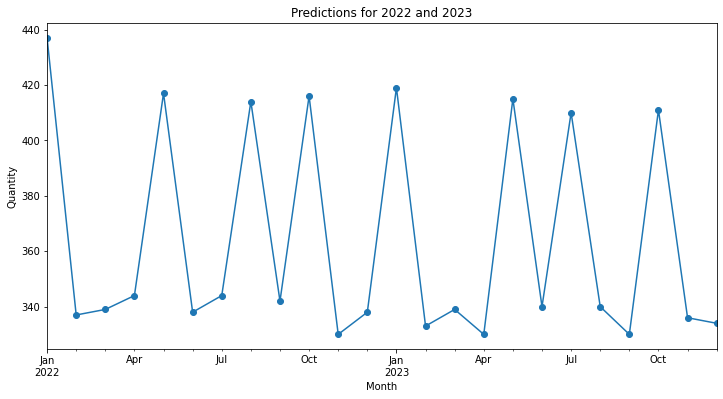

In [17]:
copy_forecast_monthly.plot(figsize=(12, 6), marker='o')

plt.ylabel('Quantity')
plt.xlabel('Month')
plt.title('Predictions for 2022 and 2023')
plt.show()